In [75]:
import pandas as pd
import numpy as np

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob

%matplotlib inline

### LOAD DATA

In [76]:
path = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/2 - USFQ Data Hub/1 - DATA/")

In [77]:
extension = 'csv'
os.chdir(path+'Files Open Data/')
files = glob.glob('mdg*.{}'.format(extension))
print(files) 

['mdg_homicidiosintencionales_pm_2022_mayo.csv', 'mdg_personasdesaparecidas_pm_2022_mayo.csv', 'mdg_armasilicitas_2022_pm_enero-mayo.csv']


In [78]:
data = pd.read_excel(path+'Files Open Data/mdg_detenidosaprehendidos_pm_2022_enero_mayo.xlsx')
data[['Anio', 'Mes', 'Dia']] = data['fecha_detencion_aprehension'].astype(str).str.split('-', expand=True)
data['COUNT'] = 1
data.head(5)

,tipo,edad,sexo,nacionalidad,autoidentificacion_etnica,nombre_provincia,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,Anio,Mes,Dia,COUNT
0,DETENIDO,39,MUJER,ECUATORIANO,MESTIZO/A,PICHINCHA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,2996200,2022-01-13,2022,01,13,1
1,DETENIDO,38,HOMBRE,ECUATORIANO,MESTIZO/A,COTOPAXI,DELITOS CONTRA LA INVIOLABILIDAD DE LA VIDA,SICARIATO,2022-01-13,2022,01,13,1
2,DETENIDO,32,HOMBRE,ECUATORIANO,MESTIZO/A,SANTO DOMINGO DE LOS TSACHILAS,DELITOS CONTRA LA INVIOLABILIDAD DE LA VIDA,HOMICIDIO,2022-01-27,2022,01,27,1
3,APREHENDIDO,27,HOMBRE,ECUATORIANO,MESTIZO/A,TUNGURAHUA,DELITOS DE VIOLENCIA CONTRA LA MUJER O MIEMBRO...,VIOLENCIA FÍSICA CONTRA LA MUJER O MIEMBROS DE...,2022-02-26,2022,02,26,1
4,APREHENDIDO,33,HOMBRE,VENEZOLANO,MESTIZO/A,GUAYAS,DELITOS DE VIOLENCIA CONTRA LA MUJER O MIEMBRO...,VIOLENCIA FÍSICA CONTRA LA MUJER O MIEMBROS DE...,2022-04-18,2022,04,18,1


# PROCESAMIENTO

In [81]:
data_total = data.groupby(['Anio', 'Mes', 'nombre_provincia', 'tipo', 'presunta_infraccion', 'nacionalidad', 'sexo']).agg({'COUNT':'sum'}).reset_index()

data_total_ = data_total
data_total_.columns = ['Anio', 'Mes', 'Provincia', 'Tipo', 'Presunta_infraccion', 'Nacionalidad', 'Genero', 'Numero']

data_total_

,Anio,Mes,Provincia,Tipo,Presunta_infraccion,Nacionalidad,Genero,Numero
0,2022,01,AZUAY,APREHENDIDO,BOLETAS,ECUATORIANO,HOMBRE,11
1,2022,01,AZUAY,APREHENDIDO,BOLETAS,ECUATORIANO,MUJER,1
2,2022,01,AZUAY,APREHENDIDO,CONTRAVENCIONES,ECUATORIANO,HOMBRE,2
3,2022,01,AZUAY,APREHENDIDO,CONTRAVENCIONES,ECUATORIANO,MUJER,2
4,2022,01,AZUAY,APREHENDIDO,CONTRAVENCIONES,VENEZOLANO,HOMBRE,1
...,...,...,...,...,...,...,...,...
5372,2022,05,ZAMORA CHINCHIPE,DETENIDO,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ECUATORIANO,HOMBRE,2
5373,2022,05,ZAMORA CHINCHIPE,DETENIDO,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,ECUATORIANO,HOMBRE,1
5374,2022,05,ZAMORA CHINCHIPE,DETENIDO,DELITOS DE VIOLENCIA CONTRA LA MUJER O MIEMBRO...,ECUATORIANO,HOMBRE,1
5375,2022,05,ZAMORA CHINCHIPE,DETENIDO,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,ECUATORIANO,HOMBRE,1


In [82]:
path1 = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/")
data_total_.to_csv(path1 + 'DHub DATA for WEBSITE/EC_Crimes.csv')  


## Incidentes totales

In [24]:
data_t = data_total.groupby(['presunta_infraccion']).agg({'COUNT':'sum'}).reset_index()
data_t = data_t.sort_values(by='COUNT', ascending = True)

<AxesSubplot:xlabel='COUNT', ylabel='presunta_infraccion'>

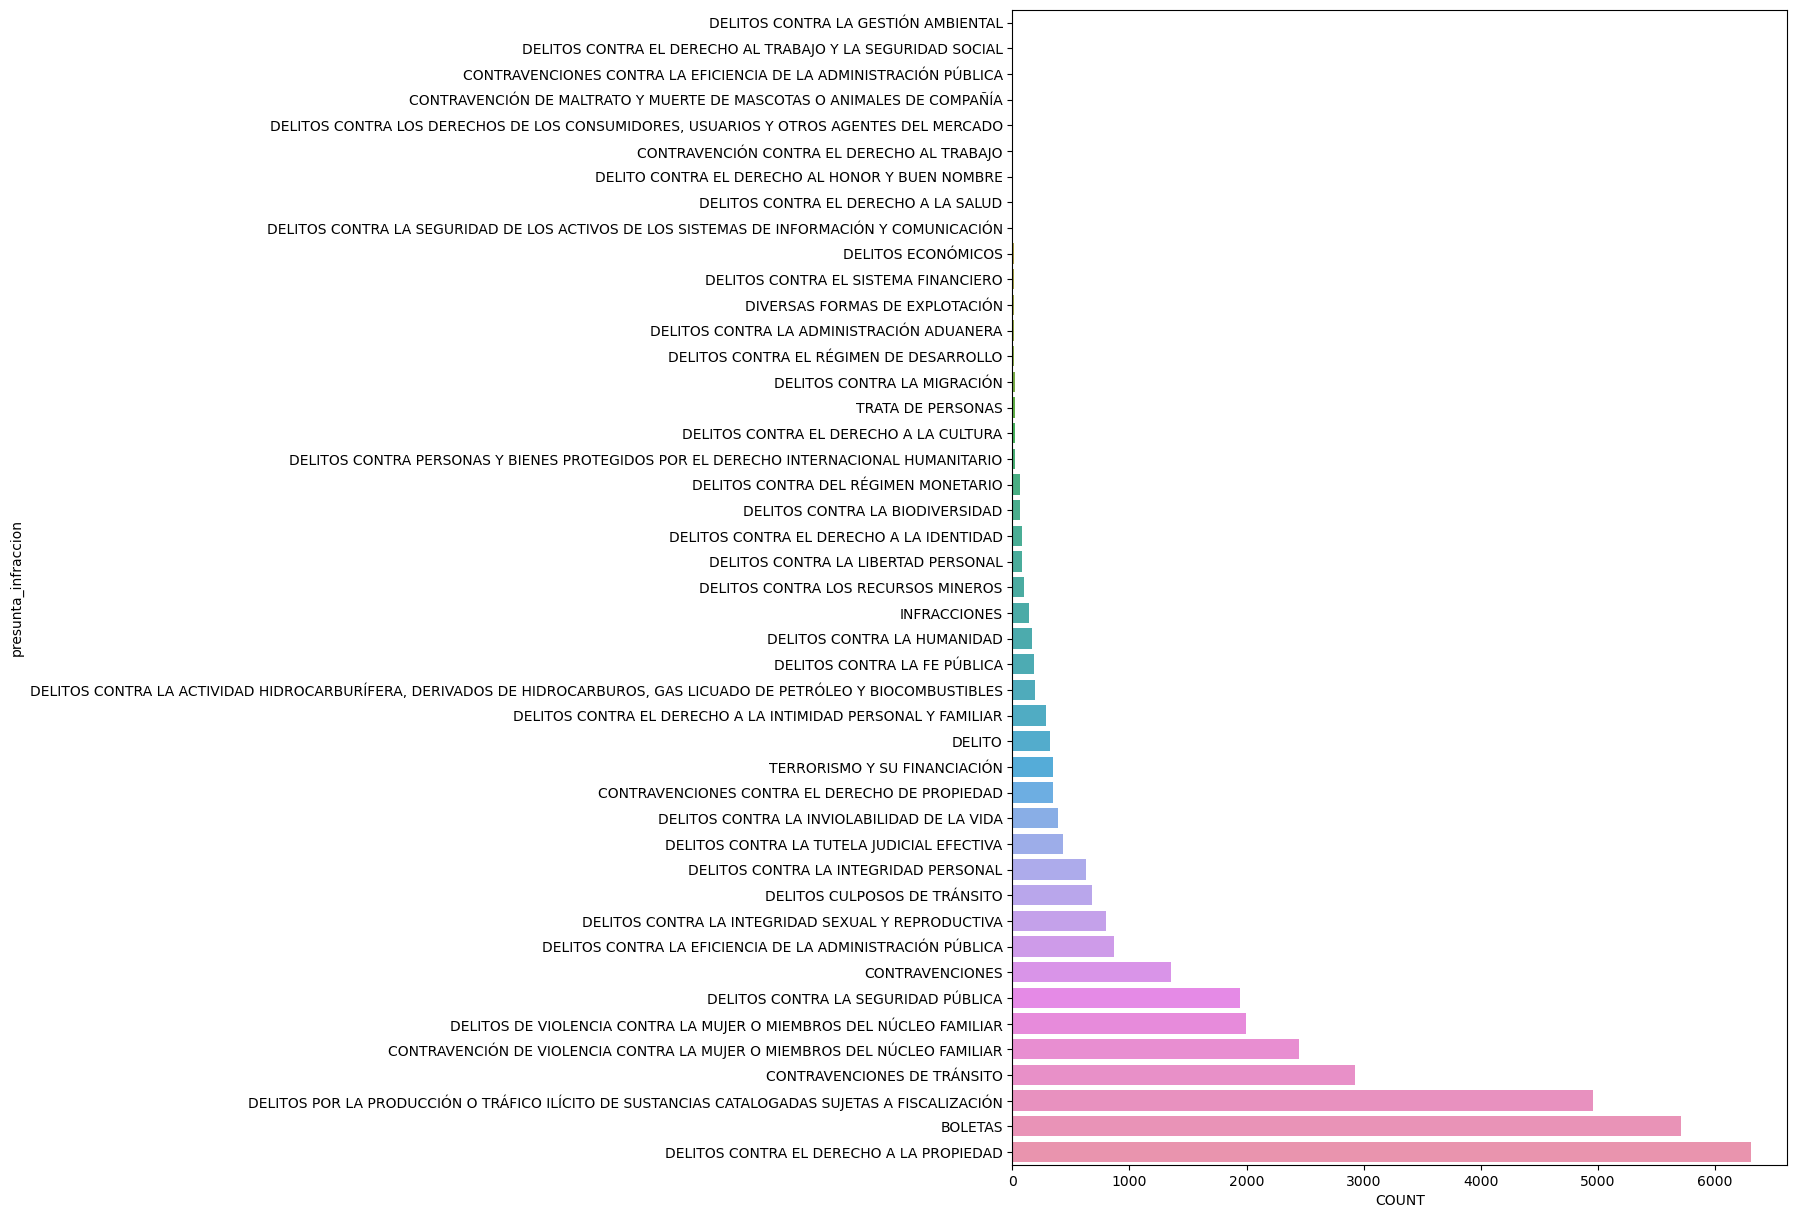

In [32]:
plt.rcParams['figure.figsize'] = [10, 15]

sns.barplot(data=data_t, x="COUNT", y="presunta_infraccion")

## Incidentes por provincia

In [37]:
data_prov = data_total.groupby(['nombre_provincia']).agg({'COUNT':'sum'}).reset_index()
data_prov = data_prov.sort_values(by='COUNT', ascending = True)

<AxesSubplot:xlabel='COUNT', ylabel='nombre_provincia'>

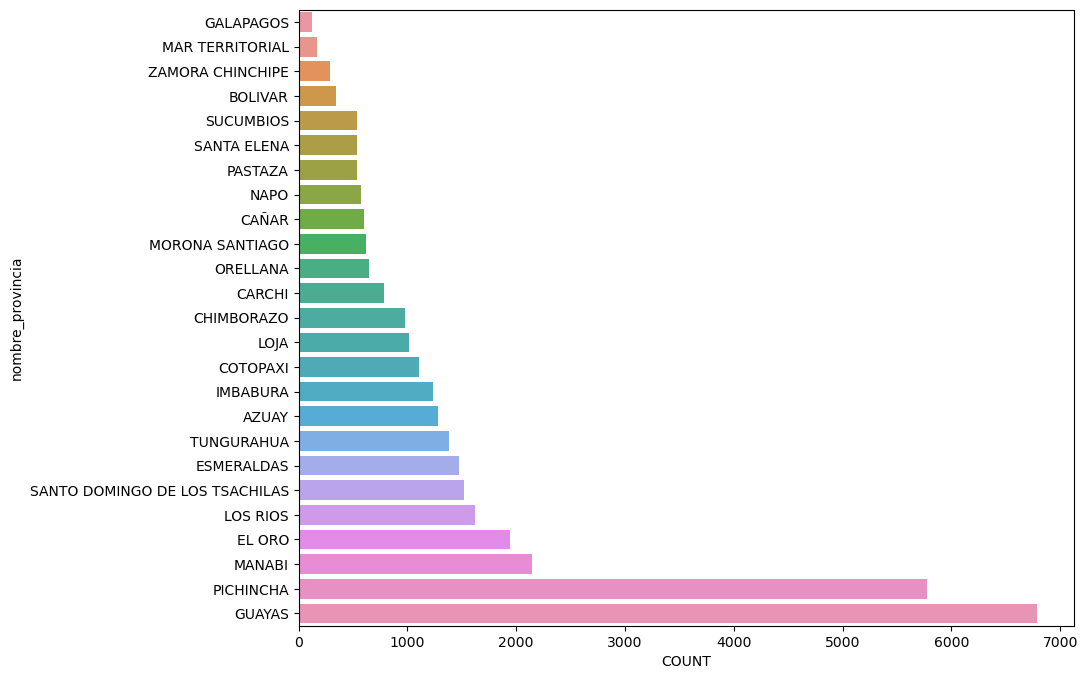

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.barplot(data=data_prov, x="COUNT", y="nombre_provincia")

## Incidentes totales por género

<AxesSubplot:xlabel='sexo', ylabel='COUNT'>

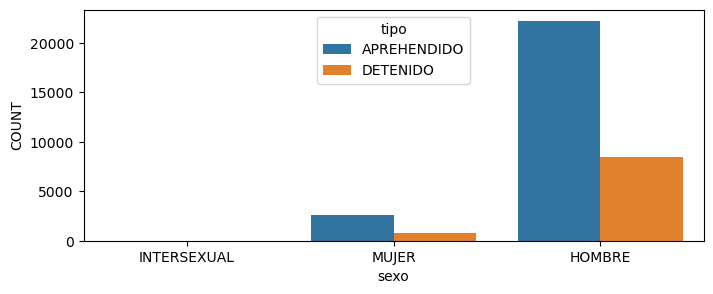

In [44]:
data_gen = data_total.groupby(['sexo', 'tipo']).agg({'COUNT':'sum'}).reset_index()
data_gen = data_gen.sort_values(by='COUNT', ascending = True)

plt.rcParams['figure.figsize'] = [8, 3]

sns.barplot(data=data_gen, x="sexo", y="COUNT", hue = 'tipo')

## Incidentes totales por nacionalidad

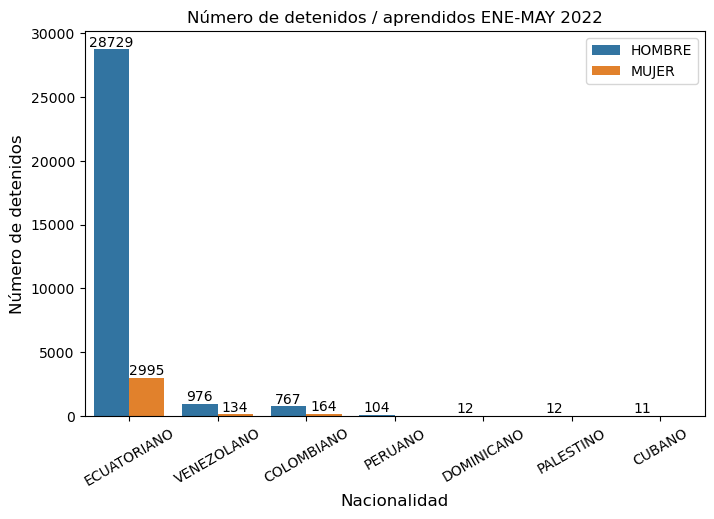

In [74]:
data_nac = data_total.groupby(['nacionalidad', 'sexo']).agg({'COUNT':'sum'}).reset_index()
data_nac = data_nac.sort_values(by='COUNT', ascending = False).head(10)

plt.rcParams['figure.figsize'] = [8, 5]

ax = sns.barplot(x='nacionalidad', y='COUNT', hue='sexo', data=data_nac, errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Número de detenidos / aprendidos ENE-MAY 2022")

ax.set_xlabel("Nacionalidad", fontsize = 12)
ax.set_ylabel("Número de detenidos", fontsize = 12)

plt.legend(loc='upper right')
